In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE

from imblearn.over_sampling import SMOTE

In [160]:
def class_accuracy(actual,pred):
    print("Accuracy:",metrics.accuracy_score(actual, pred))
    print("F1 Score:",metrics.f1_score(actual, pred))
    print("ROC AUC Score:",metrics.roc_auc_score(actual, pred))
    print("Confusion Matrix \n",metrics.confusion_matrix(actual, pred))
    import pandas as pd
    y_true = pd.Series(actual)
    y_pred = pd.Series(pred)
    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [103]:
listings = pd.read_csv('/Users/Monu/Desktop/Data Mining Project/cleaned_with_nlp_listings.csv')

In [104]:
listings.head()

,id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,2454,60,0,1.0,1.0,1,0,1,2,1.0,...,0,1,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2539,100,0,8.0,8.0,1,1,0,4,1.0,...,0,1,1,0,0.000000,0.222222,0.777778,0.000000,0.000000,0.000000
2,2595,60,0,5.0,5.0,1,1,0,2,1.0,...,0,1,0,1,0.000000,0.232558,0.302326,0.093023,0.046512,0.325581
3,3330,100,0,4.0,4.0,1,1,1,2,1.0,...,0,1,0,1,0.051282,0.102564,0.435897,0.051282,0.051282,0.307692
4,3831,96,0,1.0,1.0,1,1,1,3,1.0,...,0,1,1,0,0.004329,0.134199,0.571429,0.121212,0.086580,0.082251


In [105]:
listings.columns

Index(['id', 'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calcu

In [106]:
listings.drop(['id'],axis=1,inplace=True)

In [107]:
listings.describe()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
count,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,...,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000
mean,96.315884,0.210590,5.662826,5.662826,0.998422,0.528553,0.828608,2.950058,1.138306,1.184642,...,0.006061,0.981691,0.259781,0.491660,0.062247,0.164064,0.430393,0.055104,0.079159,0.209033
std,12.673573,0.407732,45.784125,45.784125,0.039692,0.499190,0.376856,1.916729,0.422823,0.749081,...,0.077618,0.134068,0.438520,0.499937,0.181705,0.191245,0.275933,0.115318,0.141098,0.234078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.129750,0.430000,0.000000,0.031250,0.159420
75%,100.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.014493,0.235941,0.600000,0.072581,0.105263,0.333333
max,100.000000,1.000000,1481.000000,1481.000000,1.000000,1.000000,1.000000,16.000000,15.500000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


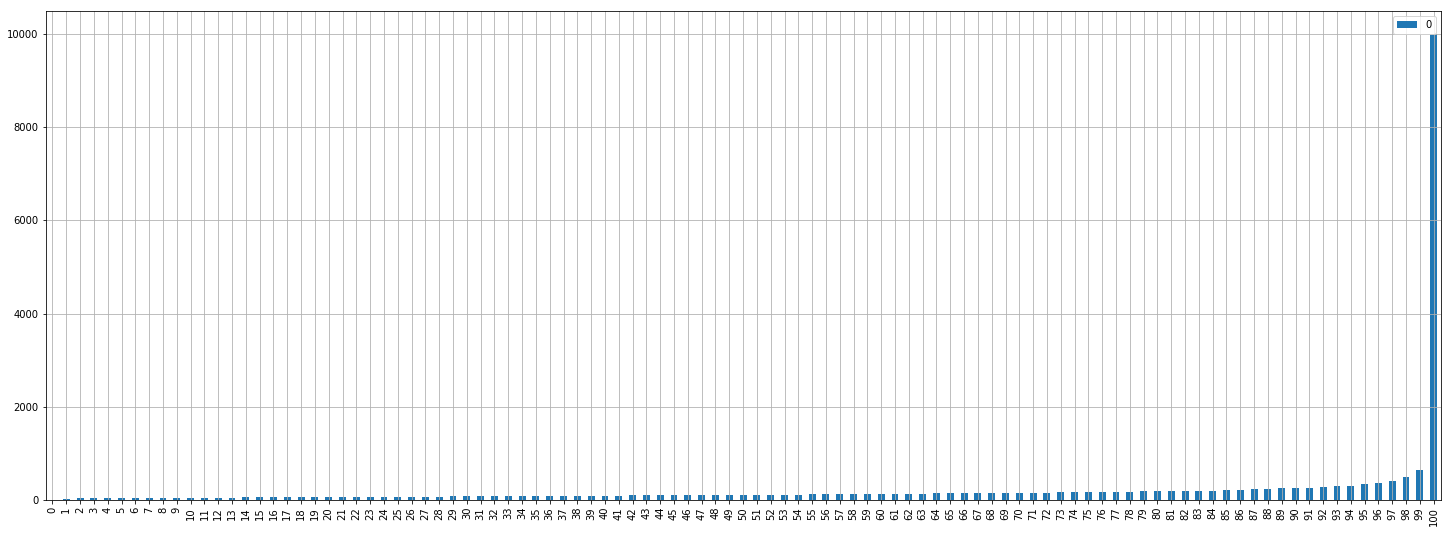

In [108]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
price_percentile.plot(kind='bar', figsize=(25,9), grid=True)

In [109]:
listings_filtered = listings[listings["price"] <= price_percentile.iloc[99,:].values[0]]
listings_filtered = listings_filtered[listings_filtered["price"] >= price_percentile.iloc[1,:].values[0]]
listings_filtered["price"].describe()

count    39187.000000
mean       132.477684
std         91.465661
min         30.000000
25%         70.000000
50%        105.000000
75%        169.000000
max        650.000000
Name: price, dtype: float64

In [110]:
base = 5
def roundto(row):
    return int(base * round(float(row)/base))
listings_filtered["price"] = listings_filtered["price"].apply(roundto)

In [111]:
percentile_val = np.percentile(listings_filtered['price'].values, 80)
print(percentile_val)

185.0


In [112]:
listings_filtered['price_binary'] = listings_filtered['price'].apply(lambda x: 1 if x <= percentile_val else 0)

In [113]:
listings_filtered['price_binary'].value_counts()

1    31385
0     7802
Name: price_binary, dtype: int64

In [114]:
listings_filtered.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_

### Preprocessing

In [115]:
ycol = ['price','price_binary']
xcol = [i for i in listings_filtered.columns if i not in ycol]
x = listings_filtered[xcol].values
y = listings_filtered[ycol].values
y = y[:,1]
print(x.shape)
print(y.shape)

(39187, 85)
(39187,)


In [116]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

### Classification Models

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [121]:
seed = 2018
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=seed)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29390, 85)
(9797, 85)
(29390,)
(9797,)


In [122]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)),0)


[[    0     1]
 [ 5889 23501]] 0


In [162]:
gbc = GradientBoostingClassifier()
gbc.fit(X=x_train, y=y_train)
y_pred_train = gbc.predict(X=x_train)
y_pred_test = gbc.predict(X=x_test)

In [163]:
class_accuracy(y_train, y_pred_train)

Accuracy: 0.8843824430078258
F1 Score: 0.93006503663456
ROC AUC Score: 0.7691433109334166
Confusion Matrix 
 [[ 3397  2492]
 [  906 22595]]


Predicted,0,1,All
True,,,
0,3397,2492,5889
1,906,22595,23501
All,4303,25087,29390


In [161]:
class_accuracy(y_test, y_pred_test)

Accuracy: 0.8798611819944882
F1 Score: 0.9274039351137975
ROC AUC Score: 0.7648177056604615
Confusion Matrix 
 [[1102  811]
 [ 366 7518]]


Predicted,0,1,All
True,,,
0,1102,811,1913
1,366,7518,7884
All,1468,8329,9797
